In [1]:
import numpy as np
import matplotlib.pyplot as plt

def square(amp,offset,period,density,start,end):
    length = (end-start)*density
    y = np.zeros(length,float)
    y.fill(offset)
    for x in range(length):
        x -= start
        if (x/density)%period < period/2:
            y[x] += amp
        else:
            y[x] -= amp
    x = np.linspace(start,end,(end-start)*density)
    return x,y


def integrate(x,y):
    length = len(x)-1
    total = 0
    for i in range(length):
        total += (x[i+1]-x[i]) * (y[i]+y[i+1])
    return total/2

def fourier(y):
    length = len(y)
    x = np.arange(0,len(y))
    an, bn = np.zeros(int(length/2), np.float64), np.zeros(int(length/2), np.float64)
    an[0] = sum(y)
    for i in range(1,int(length/2)):
        an[i] = (np.dot(y,np.cos(2*np.pi/len(y)*i*x)))
        bn[i] = (np.dot(y,np.sin(2*np.pi/len(y)*i*x)))
    return np.array([an/length*2,bn/length*2])

Text(0, 0.5, 'temperature(°C)')

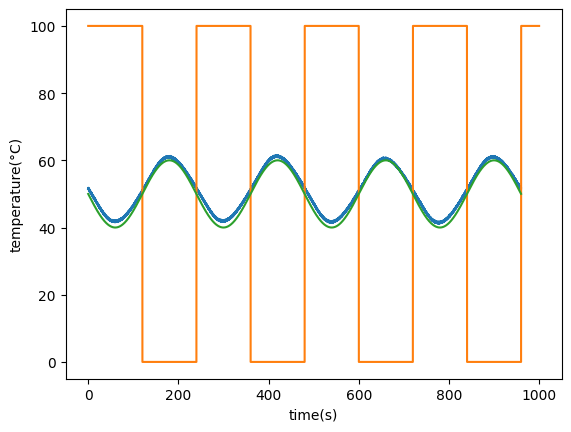

In [2]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
plt.plot(x1/10,y1)

x2, y2 = square(50,50,240,100,0,1000)
plt.plot(x2,y2)



def sin(x,amp,phase,offset):
    return amp*np.sin(2*np.pi/2400*x+phase)+offset

plt.plot(x1/10,sin(x1,10,np.pi,50))
plt.xlabel("time(s)")
plt.ylabel("temperature(°C)")


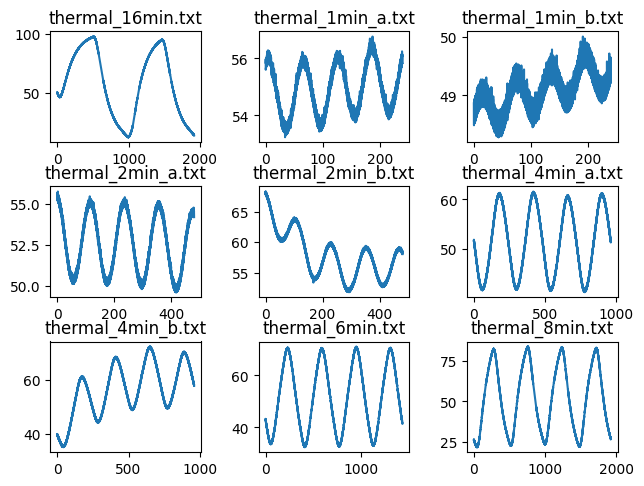

In [3]:
import os
fig, ax = plt.subplots(3,3)
fig.tight_layout()

num = 0
for file in os.listdir()[2:] + [os.listdir()[1]]:
    if file[-4:] == ".txt":
        x, y = np.loadtxt(file, unpack=True, skiprows=3)
        ax[num//3,num%3].plot(x/10,y)
        ax[num//3,num%3].set_title(file)
        num +=1



Text(0.5, 1.0, '1 minute')

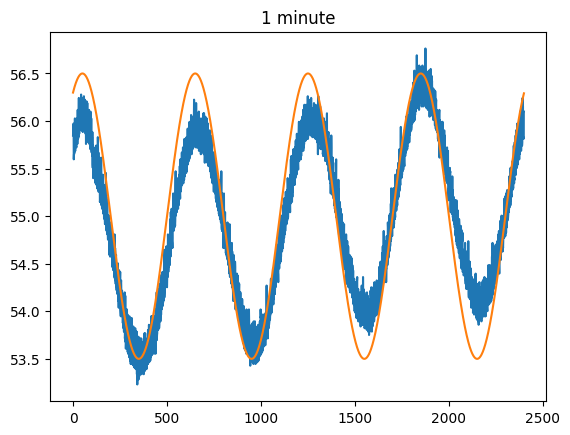

In [4]:
def sin(x,amp,phase,period,offset):
    return amp*np.sin(2*np.pi/period*x+phase)+offset
x1, y1 = np.loadtxt("thermal_1min_a.txt", unpack=True, skiprows=3)
y2 = sin(x1,1.5,np.pi/3,600,55)
plt.plot(x1,y1)
plt.plot(y2)
plt.title("1 minute")


Text(0.5, 1.0, '2 minute')

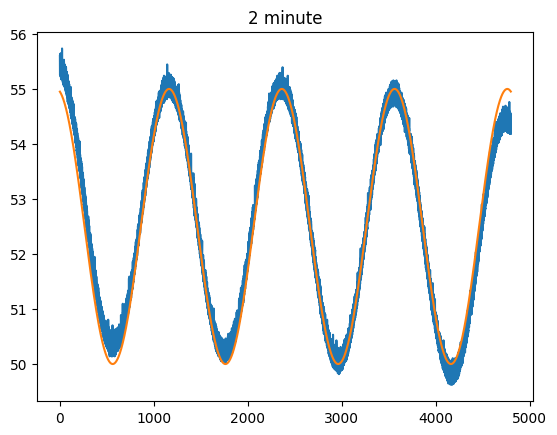

In [5]:
def sin(x,amp,phase,period,offset):
    return amp*np.sin(2*np.pi/period*x+phase)+offset
x1, y1 = np.loadtxt("thermal_2min_a.txt", unpack=True, skiprows=3)
y2 = sin(x1,2.5,np.pi/2+0.2,1200,52.5)
plt.plot(x1,y1)
plt.plot(y2)
plt.title("2 minute")

Text(0.5, 1.0, '6 minute')

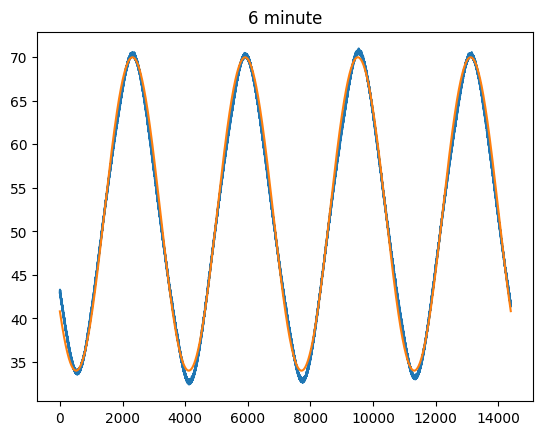

In [6]:
def sin(x,amp,phase,period,offset):
    return amp*np.sin(2*np.pi/period*x+phase)+offset
x1, y1 = np.loadtxt("thermal_6min.txt", unpack=True, skiprows=3)
y2 = sin(x1,18,3*np.pi/2-0.9,3600,52)
plt.plot(x1,y1)
plt.plot(y2)
plt.title("6 minute")

Text(0.5, 1.0, '8 minute')

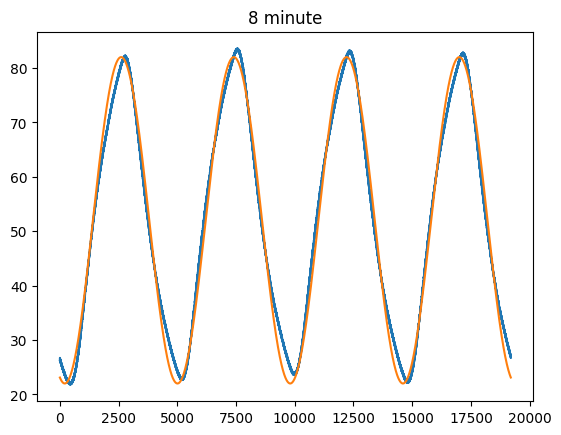

In [7]:
def sin(x,amp,phase,period,offset):
    return amp*np.sin(2*np.pi/period*x+phase)+offset
x1, y1 = np.loadtxt("thermal_8min.txt", unpack=True, skiprows=3)
y2 = sin(x1,30,np.pi+1.3,4800,52)
plt.plot(x1,y1)
plt.plot(y2)
plt.title("8 minute")

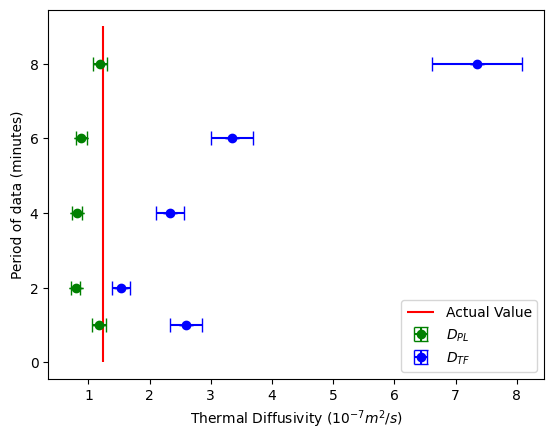

In [22]:

plt.errorbar(1.17,1,0,0.12,"o",capsize=5,color="green",label="$D_{PL}$")
plt.errorbar(0.79,2,0,0.08,"o",capsize=5,color="green")
plt.errorbar(0.81,4,0,0.08,"o",capsize=5,color="green")
plt.errorbar(0.88,6,0,0.09,"o",capsize=5,color="green")
plt.errorbar(1.19,8,0,0.12,"o",capsize=5,color="green")

plt.errorbar(2.6,1,0,0.26,"o",capsize=5,color="blue",label="$D_{TF}$")
plt.errorbar(1.53,2,0,0.15,"o",capsize=5,color="blue")
plt.errorbar(2.34,4,0,0.23,"o",capsize=5,color="blue")
plt.errorbar(3.35,6,0,0.34,"o",capsize=5,color="blue")
plt.errorbar(7.35,8,0,0.73,"o",capsize=5,color="blue")

plt.vlines(1.24,0,9,"red",label="Actual Value")
plt.xlabel("Thermal Diffusivity ($10^{-7}m^2/s$)")
plt.ylabel("Period of data (minutes)")


plt.legend()

In [9]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)[:,::4]
print(an)
print(bn)

[ 1.02563443e+02  8.29083533e-02 -1.13674711e-02 ... -5.35040852e-04
 -1.86436511e-03 -6.96712201e-03]
[ 0.00000000e+00 -9.37350934e+00  5.75611345e-02 ... -2.11695571e-03
  3.26885589e-03 -1.34054281e-03]


In [10]:
num = 9600

magnitude = np.sqrt(an[:num]**2+bn[:num]**2)

phase = np.arctan2(an[:num],bn[:num])
print(f"amplitude: {(an[4]**2+bn[4]**2)**0.5}")
print(f"phase: {phase[4]}")



amplitude: 0.009578336022489219
phase: -0.5755337730614286


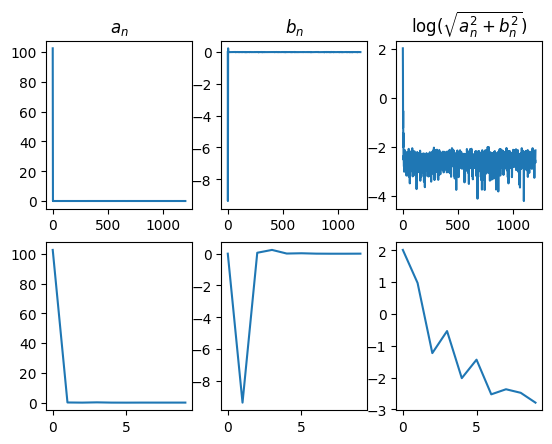

In [12]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(an)
ax[0,1].plot(bn)
ax[0,2].plot(np.log10(np.sqrt(an**2+bn**2)))
ax[1,0].plot(an[:10])
ax[1,1].plot(bn[:10])
ax[1,2].plot(np.log10(np.sqrt(an[:10]**2+bn[:10]**2)))

ax[0,0].set_title("$a_n$")
ax[0,1].set_title("$b_n$")
ax[0,2].set_title(r"log($\sqrt{a_n^2+b_n^2}$)")


Text(0.5, 1.0, 'log($\\sqrt{a_n^2+b_n^2}$)')

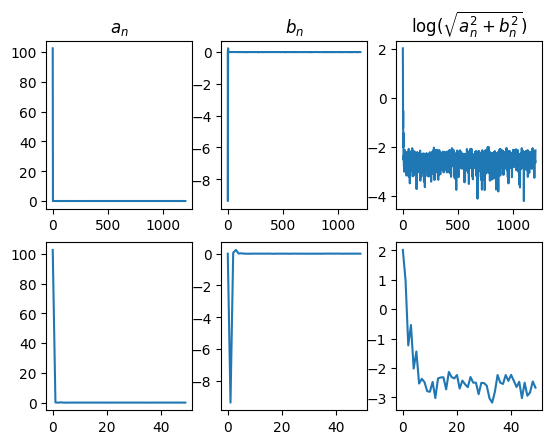

In [13]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(an)
ax[0,1].plot(bn)
ax[0,2].plot(np.log10(np.sqrt(an**2+bn**2)))
ax[1,0].plot(an[:50])
ax[1,1].plot(bn[:50])
ax[1,2].plot(np.log10(np.sqrt(an[:50]**2+bn[:50]**2)))

ax[0,0].set_title("$a_n$")
ax[0,1].set_title("$b_n$")
ax[0,2].set_title(r"log($\sqrt{a_n^2+b_n^2}$)")

Text(0.5, 1.0, 'log($\\sqrt{a_n^2+b_n^2}$)')

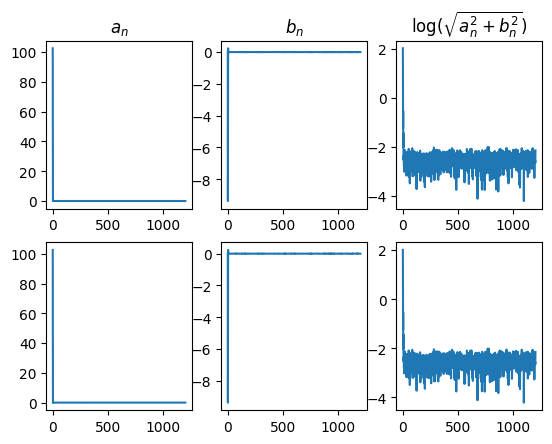

In [26]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(an)
ax[0,1].plot(bn)
ax[0,2].plot(np.log10(np.sqrt(an**2+bn**2)))
ax[1,0].plot(an)
ax[1,1].plot(bn)
ax[1,2].plot(np.log10(np.sqrt(an**2+bn**2)))

ax[0,0].set_title("$a_n$")
ax[0,1].set_title("$b_n$")
ax[0,2].set_title(r"log($\sqrt{a_n^2+b_n^2}$)")

Text(0.5, 1.0, 'log($\\sqrt{a_n^2+b_n^2}$)')

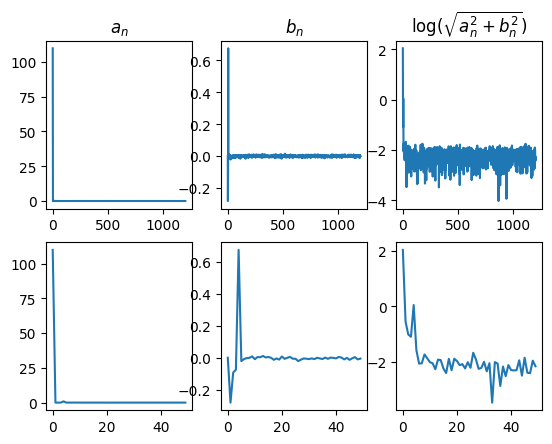

In [14]:
x1, y1 = np.loadtxt("thermal_1min_a.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)


fig, ax = plt.subplots(2,3)
ax[0,0].plot(an)
ax[0,1].plot(bn)
ax[0,2].plot(np.log10(np.sqrt(an**2+bn**2)))
ax[1,0].plot(an[:50])
ax[1,1].plot(bn[:50])
ax[1,2].plot(np.log10(np.sqrt(an[:50]**2+bn[:50]**2)))

ax[0,0].set_title("$a_n$")
ax[0,1].set_title("$b_n$")
ax[0,2].set_title(r"log($\sqrt{a_n^2+b_n^2}$)")

Text(0.5, 1.0, 'amplitude against number of harmonics')

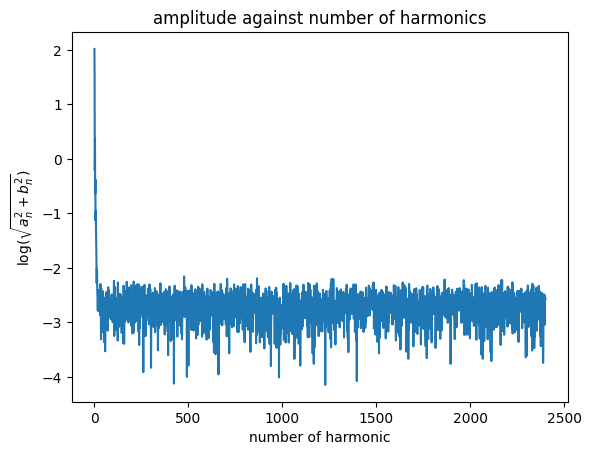

In [63]:
x1, y1 = np.loadtxt("thermal_8min.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)[:,::4]

plt.plot(np.log10(np.sqrt(an**2+bn**2)))
plt.xlabel("number of harmonic")
plt.ylabel(r"log($\sqrt{a_n^2+b_n^2}$)")
plt.title("amplitude against number of harmonics")

In [27]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)[:,::4]

transmission = np.sqrt(an[1:]**2+bn[1:]**2)/(200/np.pi/np.arange(1,len(an)))
phase_lag = np.arctan2(bn[1:],an[1:])

phase_lag += 2*np.pi
D_TF = 2*np.pi/240*np.arange(1,len(an))*0.00783**2/(2*np.log(transmission)**2)
D_PL = 2*np.pi/240*np.arange(1,len(an))*0.00783**2/(2*phase_lag**2)
print(D_TF[:5],D_PL[:5])

[2.18687986e-07 4.04885829e-08 1.30470576e-07 5.83762313e-08
 1.17034024e-07] [3.60040334e-08 2.47749528e-08 4.59162418e-08 4.51769522e-08
 5.38328302e-08]


In [45]:
x1, y1 = np.loadtxt("thermal_6min.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)[:,::4]

transmission = np.sqrt(an[1:]**2+bn[1:]**2)/(200/np.pi/np.arange(1,len(an)))
phase_lag = np.arctan2(bn[1:],an[1:])

phase_lag += 2*np.pi
D_TF = 2*np.pi/360*np.arange(1,len(an))*0.00783**2/(2*np.log(transmission)**2)
D_PL = 2*np.pi/360*np.arange(1,len(an))*0.00783**2/(2*phase_lag**2)
print(D_TF[:5],D_PL[:5])

[3.24013607e-07 3.73296490e-08 1.57989896e-07 7.00059921e-08
 1.40062953e-07] [3.26299740e-08 2.07767962e-08 4.11394442e-08 3.18919496e-08
 4.58531586e-08]


In [53]:
x1, y1 = np.loadtxt("thermal_8min.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)[:,::4]

transmission = np.sqrt(an[1:]**2+bn[1:]**2)/(200/np.pi/np.arange(1,len(an)))
phase_lag = np.arctan2(bn[1:],an[1:])

phase_lag += 2*np.pi
D_TF = 2*np.pi/480*np.arange(1,len(an))*0.00783**2/(2*np.log(transmission)**2)
D_PL = 2*np.pi/480*np.arange(1,len(an))*0.00783**2/(2*phase_lag**2)
print(D_TF[:5],D_PL[:5])

[6.06130853e-07 5.10508278e-08 2.53481516e-07 8.96233573e-08
 1.72025802e-07] [3.43308025e-08 2.06738026e-08 4.43566362e-08 2.82090849e-08
 4.87596725e-08]


In [52]:
x1, y1 = np.loadtxt("thermal_16min.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)[:,::2]

transmission = np.sqrt(an[1:]**2+bn[1:]**2)/(200/np.pi/np.arange(1,len(an)))
phase_lag = np.arctan2(bn[1:],an[1:])

phase_lag[1:] += 2*np.pi
D_TF = 2*np.pi/960*np.arange(1,len(an))*0.00783**2/(2*np.log(transmission)**2)
D_PL = 2*np.pi/960*np.arange(1,len(an))*0.00783**2/(2*phase_lag**2)
print(D_TF[:5],D_PL[:5])

[7.76597746e-07 7.03846164e-08 1.54930230e-07 1.42754022e-07
 9.90485509e-08] [2.66192456e-08 7.12013946e-09 3.67251317e-08 1.33498335e-08
 2.47979158e-08]


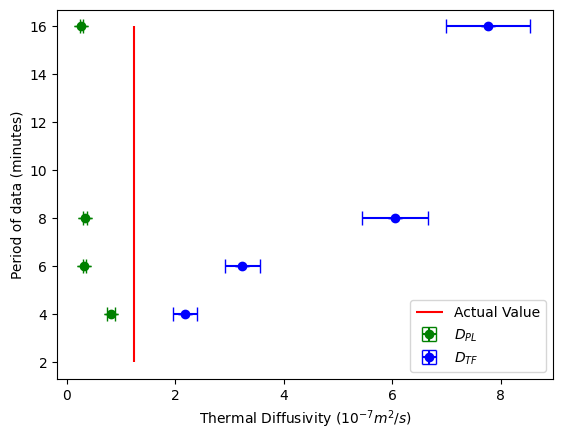

In [56]:
plt.errorbar(0.82,4,0,0.08,"o",capsize=5,color="green",label="$D_{PL}$")
plt.errorbar(0.33,6,0,0.03,"o",capsize=5,color="green")
plt.errorbar(0.34,8,0,0.03,"o",capsize=5,color="green")
plt.errorbar(0.27,16,0,0.03,"o",capsize=5,color="green")

plt.errorbar(2.19,4,0,0.22,"o",capsize=5,color="blue",label="$D_{TF}$")
plt.errorbar(3.24,6,0,0.32,"o",capsize=5,color="blue")
plt.errorbar(6.06,8,0,0.61,"o",capsize=5,color="blue")
plt.errorbar(7.77,16,0,0.78,"o",capsize=5,color="blue")

plt.vlines(1.24,2,16,"red",label="Actual Value")
plt.xlabel("Thermal Diffusivity ($10^{-7}m^2/s$)")
plt.ylabel("Period of data (minutes)")


plt.legend()